# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 14, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import some packages, add additional packages yourself when needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

det(A) = -3 + 2 $\alpha^2$  - $\alpha$ - 3 = 2 $\alpha^2$  - $\alpha$ - 6


det(A) = 0 <=> $\alpha$ = 2 or $\alpha$ = -1.5

## (b) 1 point
For the largest value of $\alpha$ you found above, find a nonzero vector $b$ such that $Ax = b$ has infinitely many solutions. Explain your answer.

$\begin{bmatrix} 1 & -1 & 2 \\ 2 & 2 & 1 \\ 0 & 2& -3/2 \end{bmatrix}$

$Ax = b$ has infinitely many solutions if b ∈ span(A), therefore b can be equal to any linear combination o vectors   $\begin{bmatrix}1 \\ 2 \\ 0\end{bmatrix}$ and $\begin{bmatrix}-1 \\ 2 \\ 2\end{bmatrix}$ and $\begin{bmatrix} 0 \\ 2 \\ -3/2\end{bmatrix}$ for example  $\begin{bmatrix}1 \\ 2 \\ 0\end{bmatrix}$ or  $\begin{bmatrix}0 \\ 4 \\ 2\end{bmatrix}$

# Exercise 2

For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

(Make sure to import the necessary functions/packages.)

In [8]:
import scipy as sp
import scipy.linalg as sla
import numpy as np

def gaussElim(A,b):
    n = len(b)                              # 1 operation
    for k in range(0, n-1):                 # *n
        for i in range(k+1, n):             # *n
            if A[i,k] != 0.0:               # 1 operation
                lam = A[i,k] / A[k,k]       # 2 
                A[i, k+1:n] = A[i, k+1:n] - lam * A[k, k+1:n]   # 3
                b[i] = b[i] - lam * b[k]    # 3 
                
    for k in range(n-1,-1,-1):              # *n-1
        b[k] = (b[k] - np.dot(A[k,k+1:n], b[k+1:n])) / A[k,k]  # 2 + ~n
    
    return b                                # summary = 1 + n*n*(1 + 2 + 3 + 3) + (n-1)*(2 + n) = 
                                            #    = 1 + 9n^2 + n^2 + n - 2 
                                            #            = 10n^2 + n - 1 

def invert(A):
    '''invert the matrix A'''
    n = len(A)                            # 1
      
    temp = sla.lu(A)                      # N(sla.lu()) = ~2/3 * n^3
    P, L, U = temp[0], temp[1], temp[2]   # 3
    
    I = np.identity(n)                    # 1 + N(np.identity()) = 1 + ~Cn
    res = []                              # 1
    for i in range(n):                    # *n
        d = gaussElim(L, I[i])            # N(gaussElim()) = ~10n^2
        d.shape = (n, 1)                  # N(d.shape()) = k1 < n^3 
        if i == 0:                        # 1
            res = gaussElim(U, d)         # ~10n^2 
        else:
            res = np.hstack((res, gaussElim(U, d))) # N(np.hstack()) = k2 < n^3
    res = np.matmul(res, P.transpose())             # N(np.matmul()) + N(P.transpose()) = ~n^3 + ~n^2
    return  res                                     # summary = 1 + 2n^3/3 + 3 + 1 + Cn + 1 + n(10n^2 + k1 +
                                                    #    + 1 + 10n^2) + k2 + n^3 + n^2 = ~65n^3/3



M = np.random.randint(4, size=(6,6))

print('A = \n' ,np.array(M), '\n')
print('A^-1 = \n' ,invert(M), '\n')
print('A * A^-1 = \n', np.matmul(M, invert(M)).round(1), '\n')

A = 
 [[2 1 1 1 0 2]
 [2 1 1 1 0 3]
 [1 1 2 0 2 2]
 [1 2 0 3 0 1]
 [1 2 0 3 3 2]
 [1 0 0 1 2 2]] 

A^-1 = 
 [[ 1.75       -0.75       -0.5        -0.75        0.5        -0.25      ]
 [ 0.25        0.75       -0.5        -1.25        1.5        -1.75      ]
 [-0.33333333 -0.66666667  1.          1.33333333 -1.33333333  1.        ]
 [-0.41666667 -0.58333333  0.5         1.41666667 -1.16666667  1.25      ]
 [ 0.33333333 -0.33333333  0.         -0.33333333  0.33333333  0.        ]
 [-1.          1.          0.          0.          0.          0.        ]] 

A * A^-1 = 
 [[ 1. -0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1. -0.  0. -0.]
 [ 0. -0.  0.  1. -0.  0.]
 [ 0. -0.  0.  0.  1.  0.]
 [ 0.  0. -0.  0.  0.  1.]] 



## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

As shown in the comments in the code for the previous excersise, estimation of the highest term in computational complexity is $ K n^{3} $. Computational complexity can depend on the exact implementation of used function from external libraries, but the estimation holds for assumtion that highest in their computational complexity asymtotically under $ K n^3 $.

# Exercise 3

## (a) (2 points) 
What happens when Gaussian elimination with partial pivoting is used on a matrix of the following form?
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
    -1 &  1 &  0 &  0 &  1 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
$$
Do the entries of the transformed matrix grow? What happens if complete pivoting is used instead? (Note that part (a) does not require a computer.)


With partial pivoting elements of the last column of transformed matrix will grow linearly and as a result we get the largest element at i = j = n (bottom right element), which will increse condition number and. subsequently, error. With complete pivoting we are able to change the order of both rows and columns and, therefore, prevent the rapid rise of the matrix values by pivoting the column with the largest value. 

## (b) (2 points)
Write a method that generates a matrix of the form of part (a) of size $n \times n$ for any $n$. Use a library routine for Gaussian elimination with partial pivoting to solve various sizes of linear systems of this form, using right-hand-side vectors chosen so that the solution is known. Try for example the case where the true solution is a vector of uniformly distributed random numbers between 0 and 1. How do the error, residual, and condition number behave as the systems become larger? Comment on the stability (see chapter 1) of Gaussian elimination with partial pivoting in this case.

N.B. This is an artificially contrived system that does not reflect the behavior of Gaussian elimination in realistic examples.

In [9]:
import numpy as np

def gen(n):
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if j < i:
                M[i][j] = -1
            elif j == i or j == n-1:
                M[i][j] = 1
    return M

def norm(M):
    n = len(M)
    col_sums = np.zeros(n)
    for j in range(n):
        for i in range(n):
            col_sums[j] += abs(M[i][j])
    
    return np.max(col_sums)

In [13]:
print(gen(6))


[[ 1.  0.  0.  0.  0.  1.]
 [-1.  1.  0.  0.  0.  1.]
 [-1. -1.  1.  0.  0.  1.]
 [-1. -1. -1.  1.  0.  1.]
 [-1. -1. -1. -1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.]]


[1.1657341758564144e-14, 4.968729871990263e-10, 0.036550551334993076, 25.103256029133778, 344.66921312605166, 222.38122552140712, 466.2248452178545] 
 [504.37672302724394, 25119269.885376386, 680821785686305.0, 9.250215104700181e+29, 4.968333674974381e+74, 2.370644754988045e+150, 1.8040117584998524e+300] 
 [13695.21707571133, 6211668929239.232, 1.0116665137752627e+24, 9.244191688908703e+44, 6.193067695702254e+90, 6.533482551392107e+214, 6.930185918626241e+302]


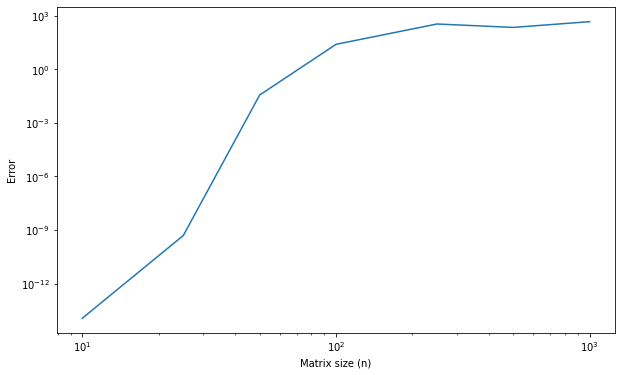

In [11]:
import numpy as np
import scipy as sp
import scipy.linalg as sla
import matplotlib.pyplot as plt


def compare(n):
    trial = gen(n)
    rand_sol = np.random.rand(n,1)
    b = trial.dot(rand_sol)
    gaus_sol = gaussElim(trial, b)
    error = np.sum(np.abs(rand_sol - gaus_sol))
    resid = np.sum(np.abs(b - trial.dot(gaus_sol)))
    cond_num = np.linalg.cond(trial)
    return error, resid, cond_num


rand_sol = np.random.rand(9,1)
A = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 0]])
b = np.array([1, 2, 3])

    
N_pow = [10, 25, 50, 10**2, 250, 500, 10**3]
error = []
resid = []
cond_num = []
for i in N_pow:
    res = compare(i)
    error.append(res[0])
    resid.append(res[1])
    cond_num.append(res[2])
print(error, '\n', resid, '\n', cond_num)
plt.figure(figsize=(10, 6))
plt.loglog(N_pow, error)
#plt.loglog(N_pow, resid)
#plt.loglog(N_pow, cond_num)

plt.xlabel('Matrix size (n)')
plt.ylabel('Error')
plt.show()

There is a rapid rise in error, residual and conditional number with Gaussian partial pivoting algorithm for the given matrix type. The method is highly unstable for this matrix type especially for residuals and conditional number which basically approach infinity for n=10^3. 